<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

# Regressão Linear Múltipla - $R^2$
Tempo estimado: **30** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Entender o impacto do $R^2$ e as razões pelas quais ele não é um bom estimador de eficiência do método

## Bibliotecas

In [1]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Importando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [2]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv"

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

In [3]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


## Regressão Linear Múltipla

### Revisando

$$
    X_k : Variáveis \ independentes \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta_1  X_1 \ + \ \beta_2  X_2 \ + \ ... + \ \beta_k  X_k
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando todos X são 0.
* b1, b2, bk : são os coeficientes de regressão, que representam a influência de cada variável X independente em Yhat

### Implementação

<p>Vamos desenvolver um modelo utilizando as seguintes variáveis como preditoras.</p>
<ul>
    <li>Horsepower</li>
    <li>Highway-mpg</li>
</ul>


In [4]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [5]:
# Ajustando o novo dataframe
#df=df[['price','engine-size', 'curb-weight']]
df_linear_multipla = df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                             'drive-wheels', 'engine-location','engine-type', 'num-of-cylinders', 'fuel-system',], axis=1)

# Criando as novas variáveis
X = df_linear_multipla.drop(["price"], axis = 1)
Y = df_linear_multipla['price']

# Carregando o modelo
lm.fit(X, Y)

# Exibindo o R^2
R2=lm.score(X,Y)

print("SCORE: %.4f" % R2)

SCORE: 0.8504


## O impacto do $R^2$

Text(0, 0.5, 'R2')

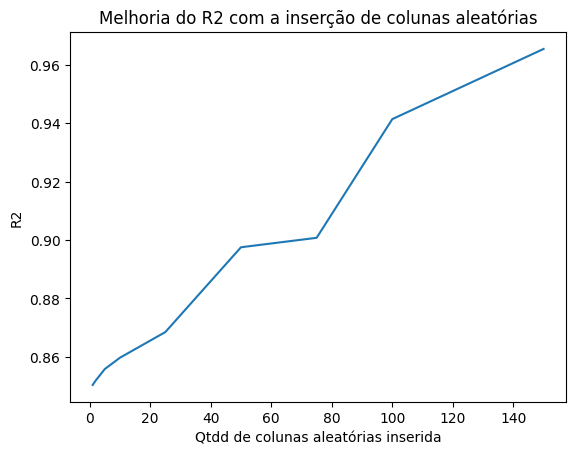

In [6]:
col_random = [1,2,5,10,25,50,75,100,150]
# Adicionando x colunas aleatórias no DF original
r2_list = []
for c in col_random:
  df_new = df_linear_multipla.copy()
  for i in range(c):
      col_name = 'Random_' + str(i+1)
      df_new[col_name] = np.random.randint(1, 100, size=len(df))

  # Criando as novas variáveis
  X = df_new.drop(["price"], axis = 1)
  Y = df_new['price']

  # Carregando o modelo
  lm.fit(X, Y)

  # Exibindo o R^2
  R2=lm.score(X,Y)
  r2_list.append(R2)

sns.lineplot(x=col_random,y=r2_list)
plt.title("Melhoria do R2 com a inserção de colunas aleatórias")
plt.xlabel("Qtdd de colunas aleatórias inserida")
plt.ylabel("R2")

* Calcular os valores previstos:

In [7]:
# Criando as novas variáveis
X = df_linear_multipla.drop(["price"], axis = 1)
Y = df_linear_multipla['price']

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

# Carregando o modelo
lm.fit(X_train, y_train)

# Exibindo o R^2
R2=lm.score(X_train,y_train)

print("SCORE: %.4f" % R2)

SCORE: 0.8574


Text(0, 0.5, 'R2')

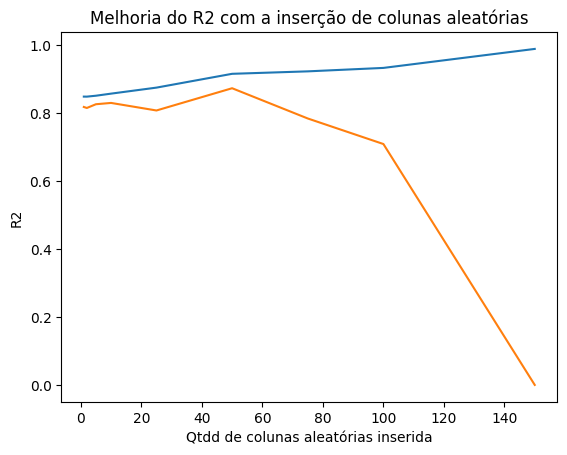

In [8]:
col_random = [1,2,5,10,25,50,75,100,150]
# Adicionando x colunas aleatórias no DF original
r2_list_train = []
r2_list_test = []
for c in col_random:
  df_new = df_linear_multipla.copy()
  for i in range(c):
      col_name = 'Random_' + str(i+1)
      df_new[col_name] = np.random.randint(1, 100, size=len(df_linear_multipla))

  # Criando as novas variáveis
  X = df_new.drop(["price"], axis = 1)
  Y = df_new['price']
  X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.10, random_state=42)

  # Carregando o modelo
  lm.fit(X_train, y_train)

  # Exibindo o R^2
  R2_train=lm.score(X_train,y_train)
  r2_list_train.append(R2_train)

  R2_teste=lm.score(X_test,y_test)
  r2_list_test.append(R2_teste)

sns.lineplot(x=col_random,y=r2_list_train)
sns.lineplot(x=col_random,y=r2_list_test)
plt.title("Melhoria do R2 com a inserção de colunas aleatórias")
plt.xlabel("Qtdd de colunas aleatórias inserida")
plt.ylabel("R2")

In [9]:
#Fazendo a predição dos dados

YHatLinMult = lm.predict(X)

# Carregando os valores previstos para o dataframe
df_linear_multipla.loc[:,'YHat'] = YHatLinMult

# Visualizando as primeiras linhas do dataframe
df_linear_multipla.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,YHat
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,13228.659547
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,16609.150020
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,17291.493629
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,13376.677717
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,17471.353336


In [10]:
# Analisando a estatística descritiva
df_linear_multipla[['price','YHat']].describe()

,price,YHat
count,201.000000,201.000000
mean,13207.129353,13223.460533
std,7947.066342,7806.477698
min,5118.000000,-10576.007737
25%,7775.000000,7933.414975
50%,10295.000000,10891.090553
75%,16500.000000,17092.996467
max,45400.000000,45168.242190


### Comparando Previsto x Real

Vamos usar o recurso gráfico para visualizar esse erro.

Text(45000, 3.3e-05, 'SCORE: 0.857358')

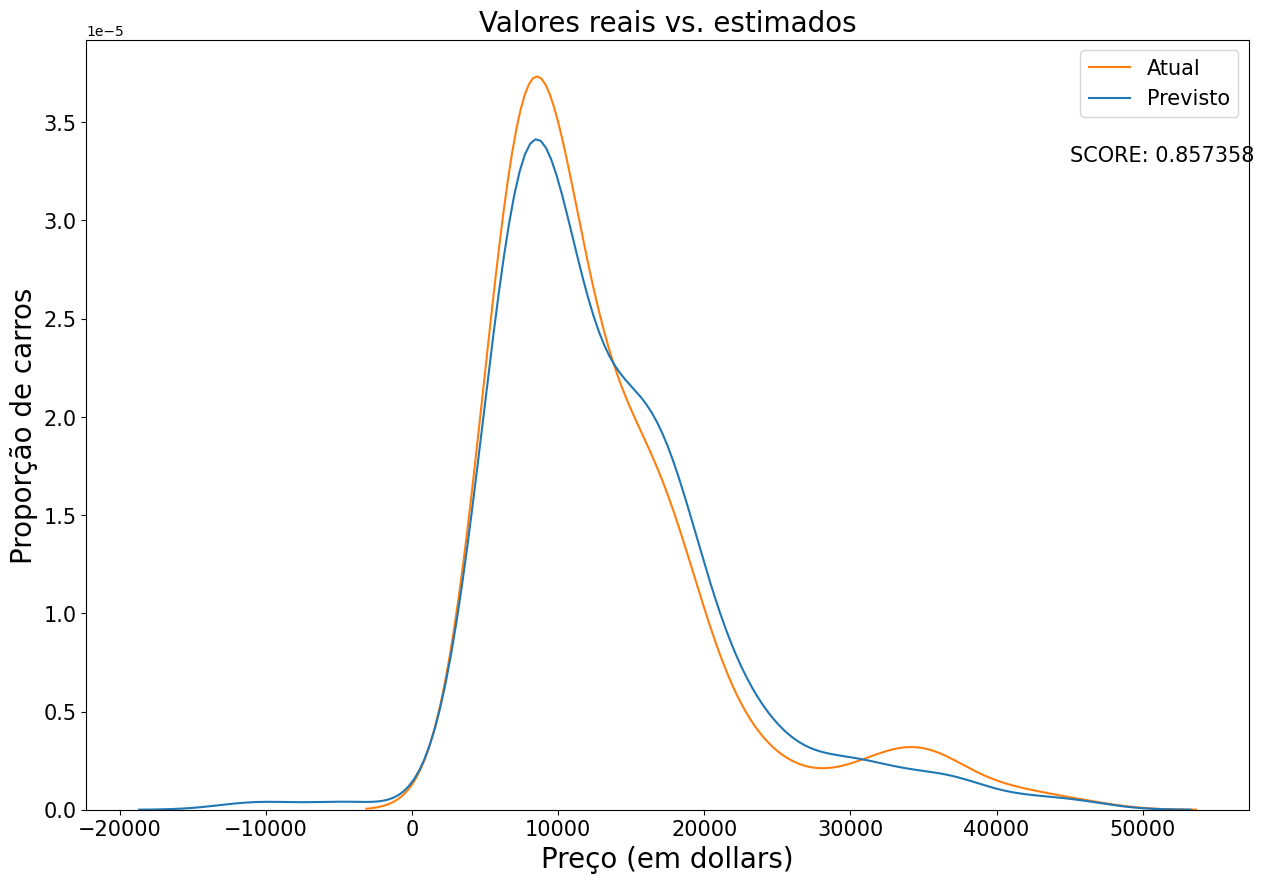

In [11]:
plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_linear_multipla[['YHat','price']])

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

tt = "SCORE: %4f" % R2

plt.text(45000, 0.000033, tt, size = 15)

### Cálculo dos erros

Text(0.5, 0, 'Resíduo (em dollars)')

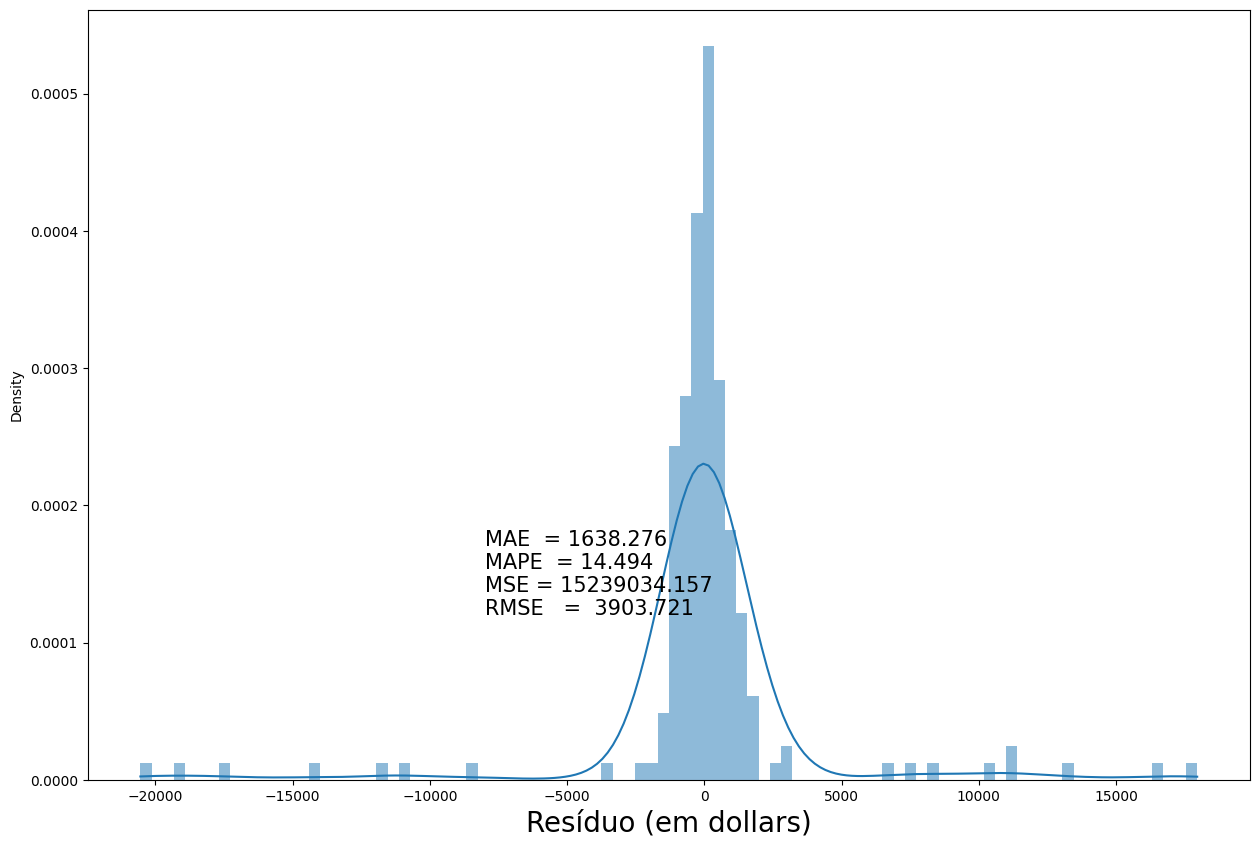

In [12]:
# Erro
df_linear_multipla.loc[:,'Deviation'] = df_linear_multipla['YHat']-df_linear_multipla['price']

y_train = df_linear_multipla['price']
y_pred  = df_linear_multipla['YHat']

mae = mean_absolute_error(y_train, y_pred)
mape = 100*mean_absolute_percentage_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

plt.figure(figsize=(15, 10))

tt = "MAE  = %.3f \nMAPE  = %.3f \nMSE = %.3f \nRMSE   =  %.3f" % (mae, mape, mse, rmse)

sns.histplot(x=df_linear_multipla['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-8000, 0.00012, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
|  17-04-2023          | 1.0     | Hesau Hugo    | Inicial               |
| 22-04-2024       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 18-09-2024       | 1.2     | João Gabriel      | Atualização           |